# Result processing

# Results from binary classifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pickle

In [8]:
def compare_masks(predicted_mask, real_mask, seed):
    """
    Compare two masks to check how they differ.
    images: first mask, second mask, and the difference between them.
    
    Args:
        predicted_mask (list): The first mask to compare.
        real_mask (list): The second mask to compare.
    """
    # using matplotlib to visualize the masks
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.imshow(predicted_mask, cmap='gray')
    ax1.set_title(f'Predicted Mask {seed}')
    ax1.axis('off')
    ax2.imshow(real_mask, cmap='gray')
    ax2.set_title('Real Mask')
    ax2.axis('off')
    ax3.imshow(abs(predicted_mask - real_mask), cmap='gray') # might not be totally correct TODO (one sided difference)
    ax3.set_title('Absolute Difference')
    ax3.axis('off')
    plt.show()

Loading results_classifier_vertical_noise_window_3x3_1498669098.pkl
Loading results_classifier_vertical_noise_window_3x3_1307335045.pkl
Loading results_classifier_vertical_noise_window_3x3_1499111720.pkl


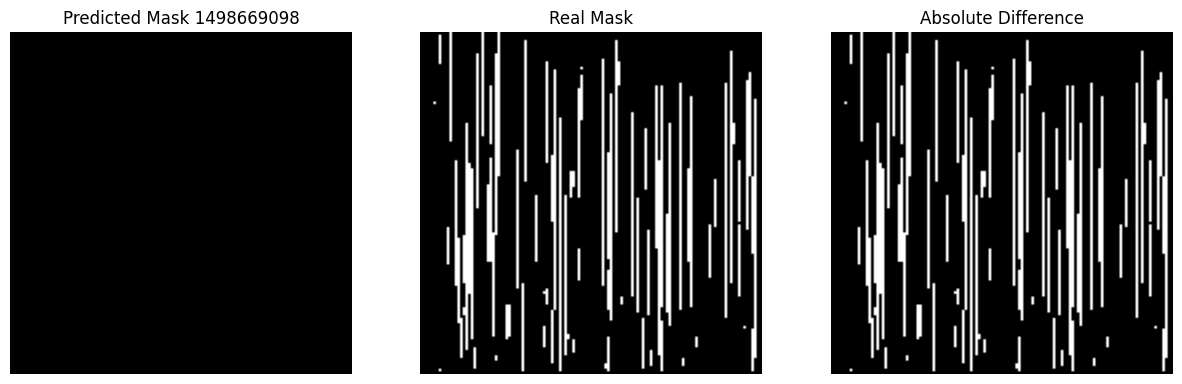

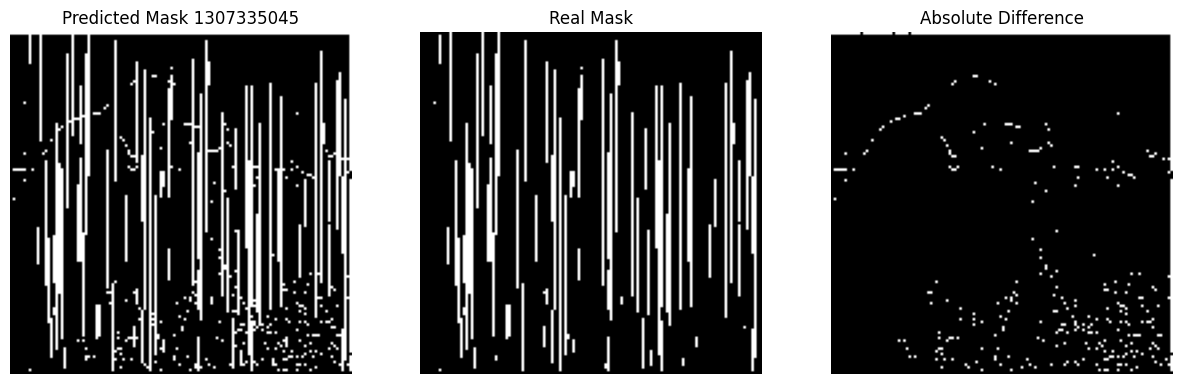

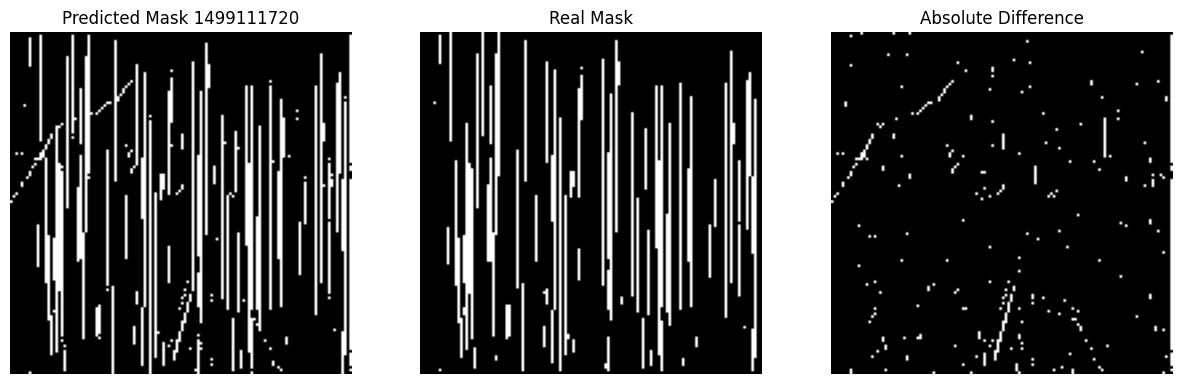

In [10]:
# import all results from results directory
def import_results(results_dir):
    results = []
    for filename in os.listdir(results_dir):
        if filename.startswith('results_classifier') and filename.endswith('.pkl'):
            print(f'Loading {filename}')
            result = pickle.load(open(os.path.join(results_dir, filename), 'rb'))
            results.append(result)
    return results

results = import_results('results')
for i in range(len(results)):
    pred_mask = results[i]['pred_mask']
    mask = results[i]['mask']
    # compare the predicted mask with the ground truth mask
    compare_masks(pred_mask, mask, results[i]["seed"])

## Results from image filtering

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pickle

In [23]:
def compare_images(filtered_image, original_image, noised_image, seed):
    """
    Compare two images to check how they differ.
    images: first image, second image, and the difference between them.
    
    Args:
        filtered_image (list): The first image to compare.
        original_image (list): The second image to compare.
    """
    # using matplotlib to visualize the images
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.imshow(noised_image, cmap='gray')
    ax1.set_title(f'Noised Image')
    ax1.axis('off')
    ax2.imshow(filtered_image, cmap='gray')
    ax2.set_title(f'Filtered Image {seed}')
    ax2.axis('off')
    ax3.imshow(original_image, cmap='gray')
    ax3.set_title('Original Image')
    ax3.axis('off')
    plt.show()

Loading results_filter_vertical_noise_window_3x3_1563022354.pkl


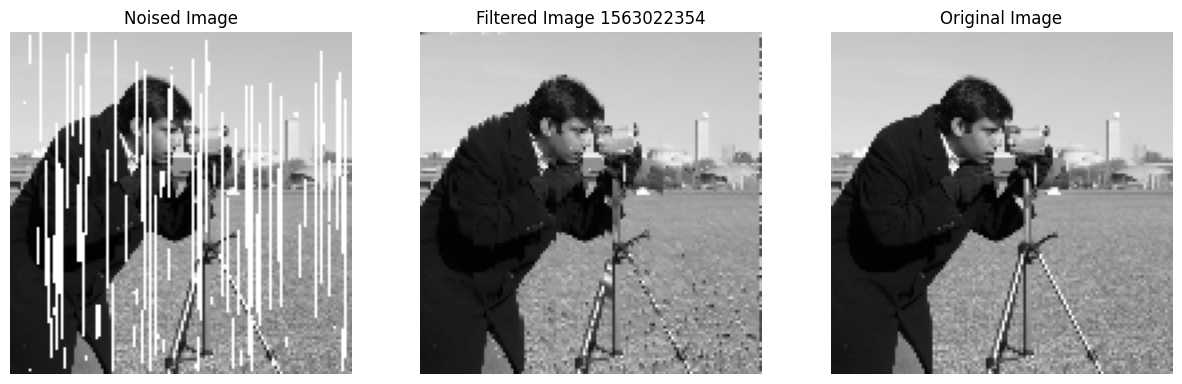

In [25]:
# import all results from results directory
def import_results(results_dir):
    results = []
    for filename in os.listdir(results_dir):
        if filename.startswith('results_filter') and filename.endswith('.pkl'):
            print(f'Loading {filename}')
            result = pickle.load(open(os.path.join(results_dir, filename), 'rb'))
            results.append(result)
    return results

results = import_results('results')
for i in range(len(results)):
    filtered = results[i]['filtered_image']
    original = results[i]['original_image']
    noised = results[i]['noised_image']
    # compare the predicted mask with the ground truth mask
    compare_images(filtered, original, noised, results[i]["seed"])